In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.16.1


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape


(60000, 28, 28)

In [6]:
len(train_labels)


60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape


(10000, 28, 28)

In [9]:
len(test_labels)


10000

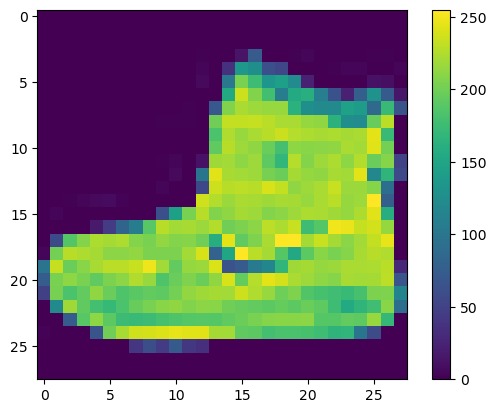

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

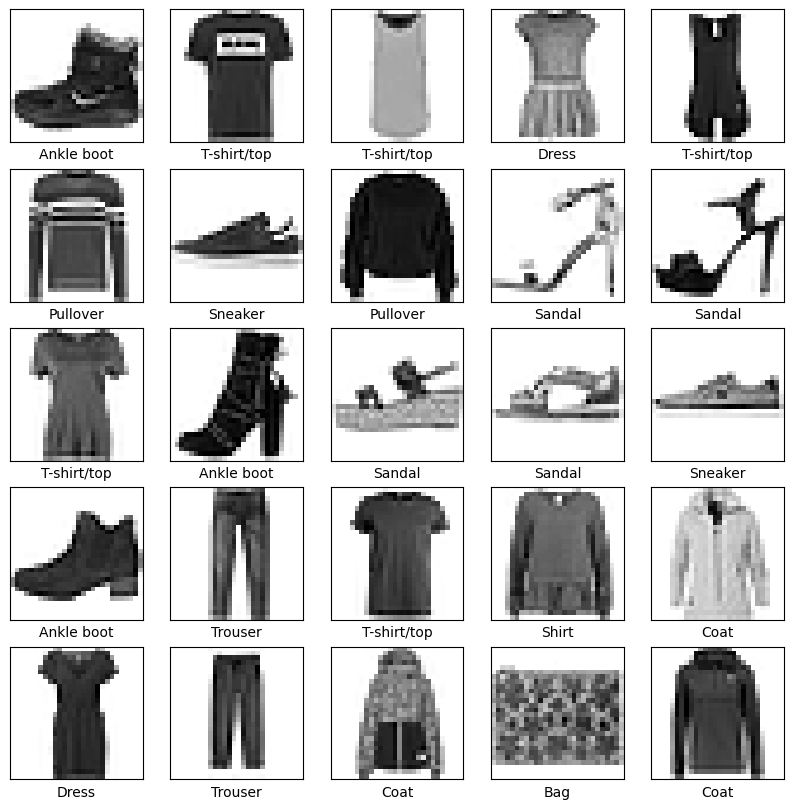

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [14]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

C:\anaconda\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.1820 - loss: 2.3716

Test accuracy: 0.18199999630451202


In [17]:
probability_model = tf.keras.Sequential([model,
tf.keras.layers.Softmax()])


In [18]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step


In [19]:
predictions[0]


array([0.09001704, 0.05707569, 0.06489464, 0.08595129, 0.15450537,
       0.10279828, 0.06397405, 0.1088772 , 0.14895722, 0.12294914],
      dtype=float32)

In [20]:
np.argmax(predictions[0])


4

In [21]:
test_labels[0]


9

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Example usage:
# plot_image(0, predictions[0], test_labels, test_images, class_names)
# plot_value_array(0, predictions[0], test_labels)
# plt.show()


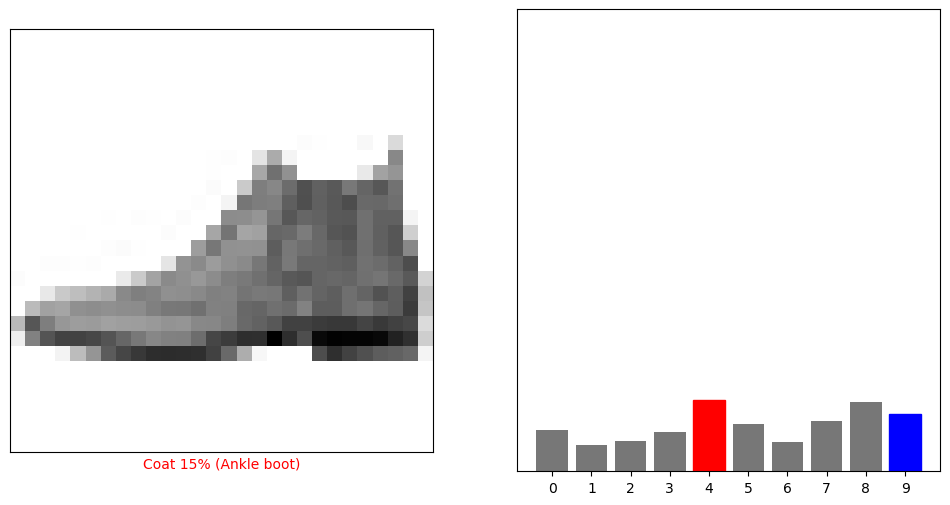

In [25]:
i = 0
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images, class_names)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


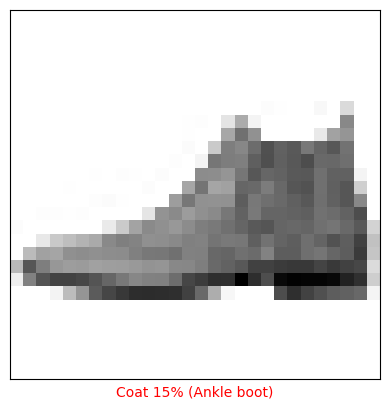

In [26]:
plot_image(i, predictions[i], test_labels, test_images, class_names)


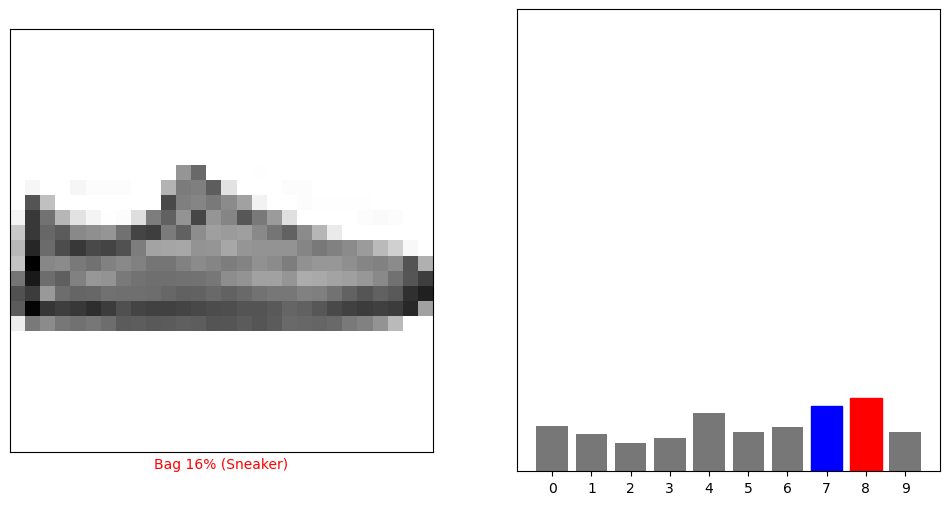

In [27]:
i = 12
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images, class_names)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


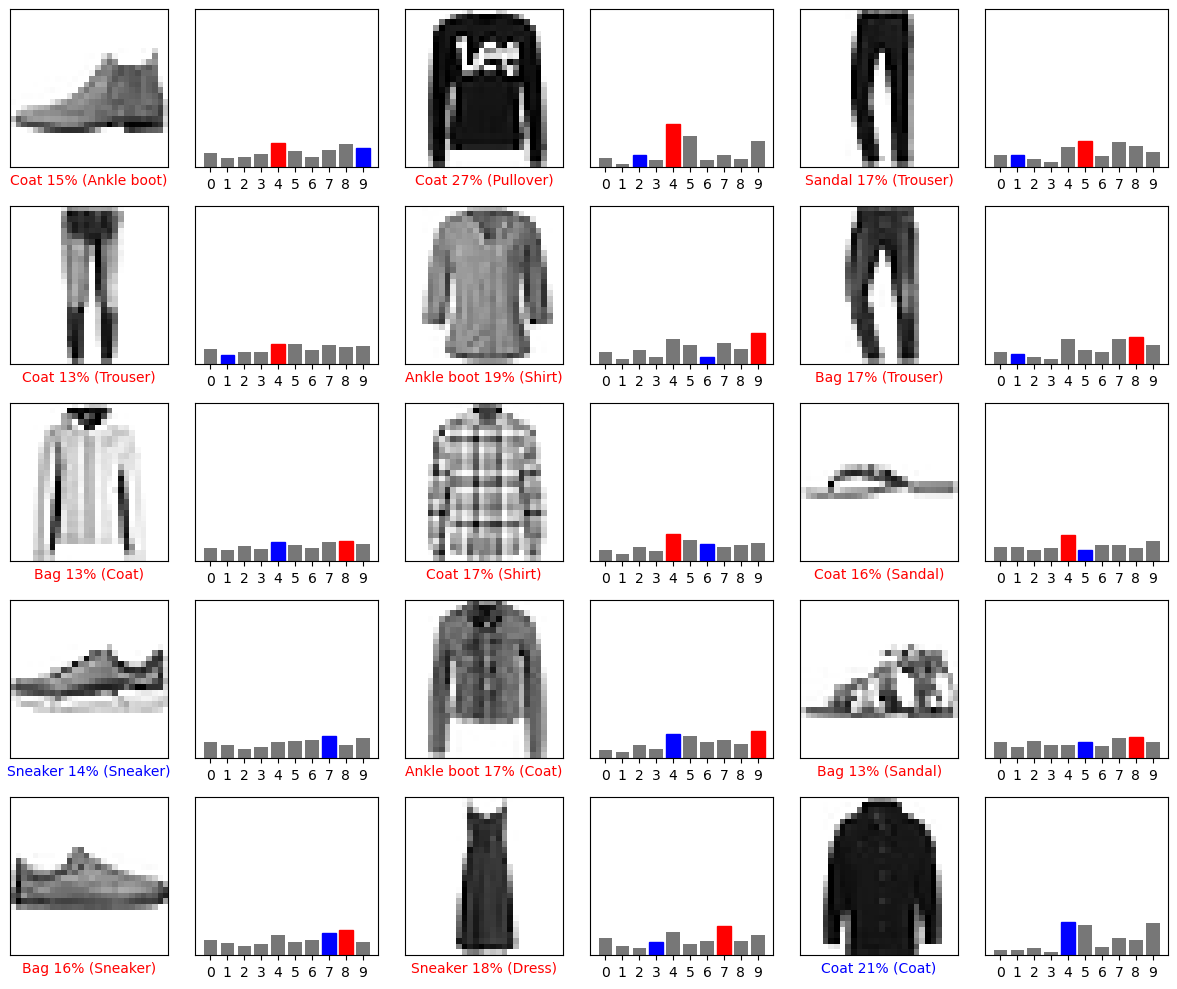

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [29]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)


(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)
print(predictions_single)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.05873908 0.02195349 0.0748295  0.04420656 0.27095482 0.19480626
  0.04511402 0.07592916 0.05000681 0.16346024]]


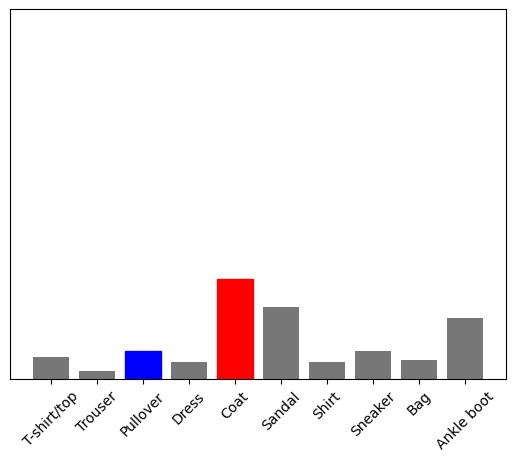

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [33]:
np.argmax(predictions_single[0])

4